This notebook takes DK68 parcellation receptor densities from .csv from https://github.com/netneurolab/hansen_gene-receptor/blob/main/data/PET_receptors.csv and performs a permutation to match the order of the 68 regions DK parcellation connectome we are using in TVB.

In [2]:
import pandas as pd
import os
import numpy as np
import plotly
import plotly.graph_objs as go

In [3]:
# Apply permutation on receptor data so that it matches with region ordering of connectome
# tvb_centers: The centers defined in the connectome
tvb_centers = np.loadtxt('./data/connectivity/connectivity_68_QL20120814_centres.txt', dtype=str)
tvb_centers_names = tvb_centers[:,0]
# rec_centers: The centers defined in the receptor maps (that has a different ordering)
rec_centers_names = np.loadtxt('./data/receptors/DK68/centers.txt', dtype=str)
tvb_centers_names = [center[:-2] for center in tvb_centers_names] # remove _L or _R info at the end
permutation_L = []
permutation_R = []
permutation = []
for i,tvb_center in enumerate(tvb_centers_names[::2]):
    found = None
    for j,rec_center in enumerate(rec_centers_names):
        if tvb_center == rec_center:
            found = j
            break
    if found is None:
        print(tvb_center)
    permutation.append(j)
    permutation.append(j+34)

In [6]:
receptor_path = './data/receptors/DK68'
PET_receptors_filepath = os.path.join(receptor_path, 'PET_receptors.csv')

receptor_names = ["5HT1a", "5HT1b", "5HT2a", "5HT4", "5HT6", "5HTT", "A4B2",
                  "CB1", "D1", "D2", "DAT", "GABAa", "H3", "M1", "mGluR5",
                  "MOR", "NET", "VAChT"]
receptors = pd.read_csv(PET_receptors_filepath, header=None, names=receptor_names)
serotonin_names = ["5HT1a", "5HT1b", "5HT2a", "5HT4", "5HT6", "5HTT"]
receptors = receptors[serotonin_names]
print(receptors)

       5HT1a     5HT1b     5HT2a      5HT4      5HT6      5HTT
0  -0.055194 -0.076781  0.549199 -0.125825 -0.493537  0.240342
1  -0.742660  0.144592  1.038358  0.324462 -0.794468 -0.776788
2   0.306076 -0.688562  0.875747  0.193125 -2.443975 -0.851904
3   0.795316  0.261493  0.328596  0.567860 -0.072114 -0.127707
4  -0.399635  1.049912  0.587159  0.026801  0.872626 -0.579039
..       ...       ...       ...       ...       ...       ...
63  0.257952 -0.386938  1.455048  2.158173  1.211699 -0.824236
64  0.468462  0.300777  1.176355  1.783008  1.465469 -0.276944
65  0.680373 -0.632014  0.208186  1.272443  0.626388  0.517977
66  0.620202  0.409438  0.635072  0.012247  1.138139  1.206591
67  1.727328  0.081706 -0.602245  0.487313  1.640929  2.650131

[68 rows x 6 columns]


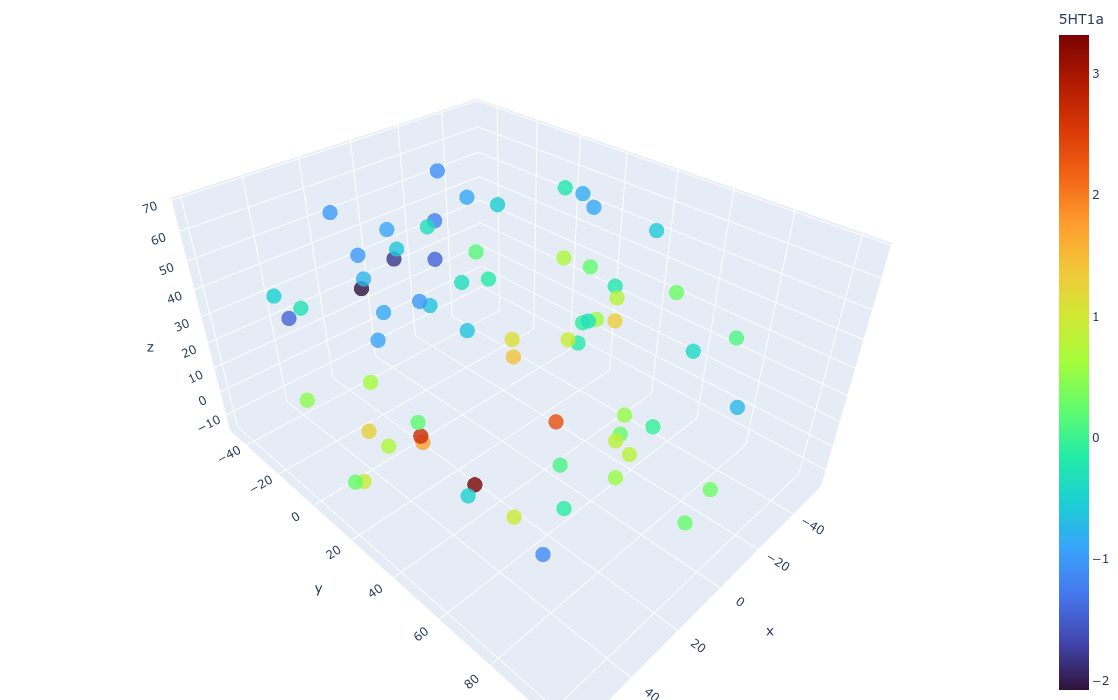

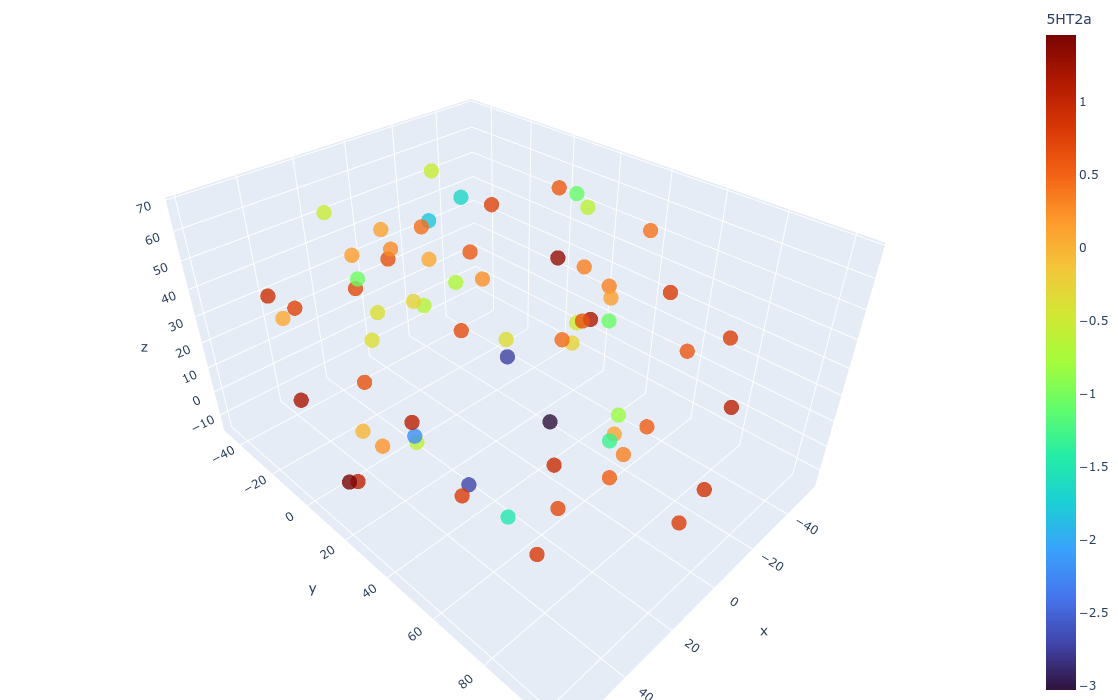

In [13]:
# Plotting and saving receptor values on each center
# Can check that:
# - values roughly symmetrical btwn L and R hemispheres
# - Similar distribution as in A High-Resolution In Vivo Atlas of the Human Brain's Serotonin System for instance
import numpy as np
plotly.offline.init_notebook_mode(connected=True)

tvb_centers_coords = tvb_centers[:,1:].astype(float)
for i,serotonin_name in enumerate(serotonin_names):
    rec = receptors[serotonin_name]
    rec = rec[permutation]
    # Plot 5HT1a and 5HT2a
    if i in (0,2): 
        trace = go.Scatter3d(x=tvb_centers_coords[:, 0], y=tvb_centers_coords[:, 1], z=tvb_centers_coords[:, 2], mode='markers',
            marker=dict(
                size=5,
                opacity=0.8,
                color=rec,               # <- Use ht2a values for color
                colorscale='Turbo',     # <- Choose any colorscale: 'Viridis', 'Jet', 'Hot', etc.
                colorbar=dict(title=serotonin_name)))
        
        layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0), width=800, height=700)
        
        fig = go.Figure(data=[trace], layout=layout)
        plotly.offline.iplot(fig)
    np.savetxt(f'./data/receptors/DK68/{serotonin_name}_reordered.txt', rec)